In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [51]:
df = pd.read_excel("System_combined.xlsx")
df

,Unnamed: 0,DateTime,systemPrice
0,0,2018-01-01 00:00:00,26.263485
1,1,2018-01-01 01:00:00,26.382834
2,2,2018-01-01 02:00:00,26.043561
3,3,2018-01-01 03:00:00,24.585894
4,4,2018-01-01 04:00:00,24.626124
...,...,...,...
52579,8755,2023-12-31 19:00:00,49.594203
52580,8756,2023-12-31 20:00:00,44.985186
52581,8757,2023-12-31 21:00:00,44.755875
52582,8758,2023-12-31 22:00:00,43.986141


In [52]:
df.set_index("DateTime", inplace=True)
df.sort_index(ascending=True)
df = df.drop("Unnamed: 0", axis = 1)
df

,systemPrice
DateTime,
2018-01-01 00:00:00,26.263485
2018-01-01 01:00:00,26.382834
2018-01-01 02:00:00,26.043561
2018-01-01 03:00:00,24.585894
2018-01-01 04:00:00,24.626124
...,...
2023-12-31 19:00:00,49.594203
2023-12-31 20:00:00,44.985186
2023-12-31 21:00:00,44.755875


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52584 entries, 2018-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   systemPrice  52578 non-null  float64
dtypes: float64(1)
memory usage: 821.6 KB


In [54]:
df.isna().sum()

systemPrice    6
dtype: int64

In [55]:
# Using time series interpolation to fill in the 6 missing values 
df['systemPrice'].interpolate(method='time', inplace=True)


In [56]:
df.isna().sum()

systemPrice    0
dtype: int64

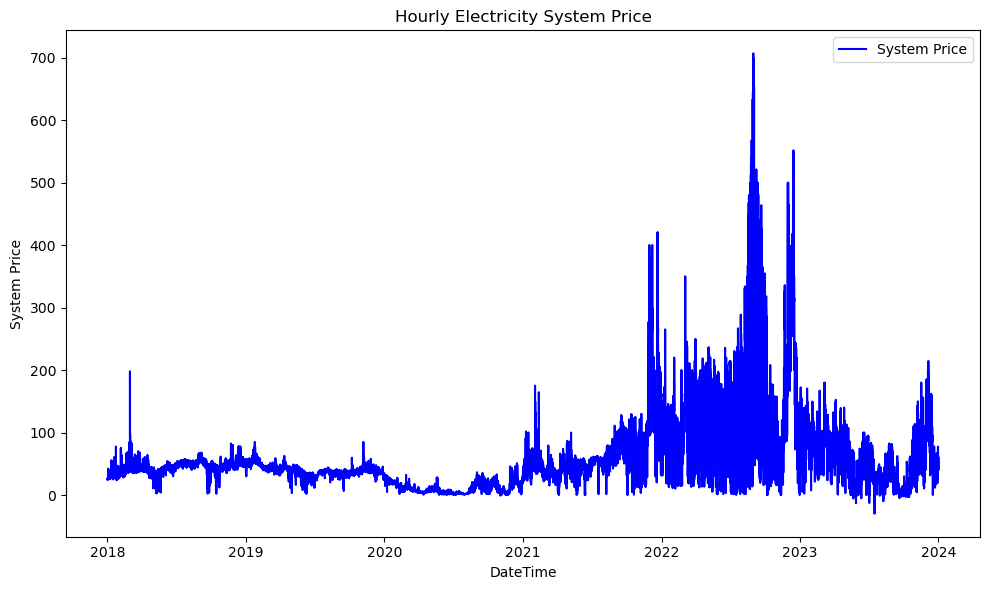

In [57]:
# Plotting
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.plot(df.index, df['systemPrice'], label='System Price', color='blue')  # Plot systemPrice
plt.title('Hourly Electricity System Price')  # Title
plt.xlabel('DateTime')  # X-axis label
plt.ylabel('System Price')  # Y-axis label
plt.legend()  # Show legend
plt.tight_layout()  # Optional: Adjust layout to make room for labels

# To show the plot if not automatically displayed
plt.show()


### Resample data and visualize to look for daily, weekly, monthly, annual trend

In [58]:
daily_data = df.resample('D').mean()
weekly_data = df.resample('W').mean()
monthly_data = df.resample('M').mean()
yearly_data = df.resample('A').mean()

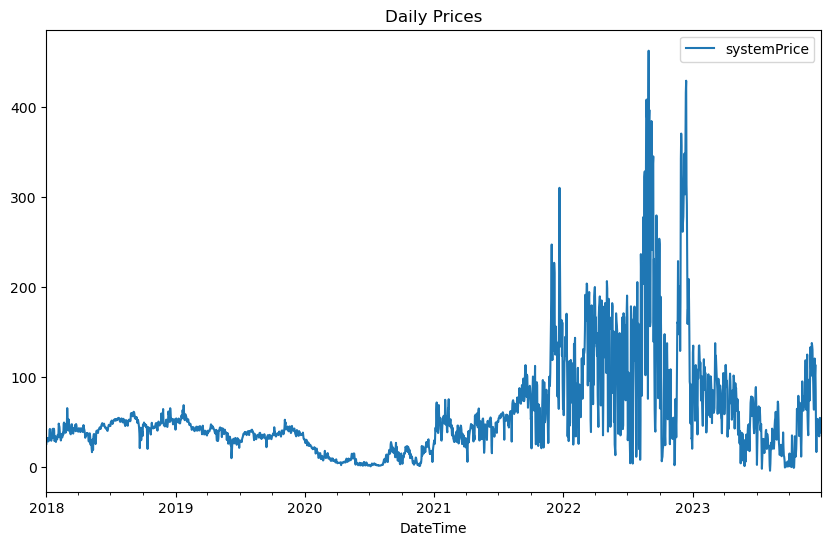

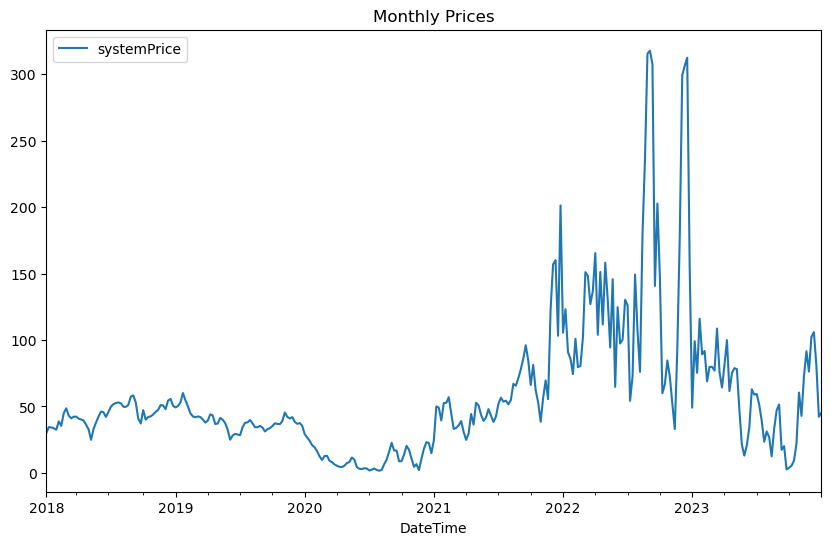

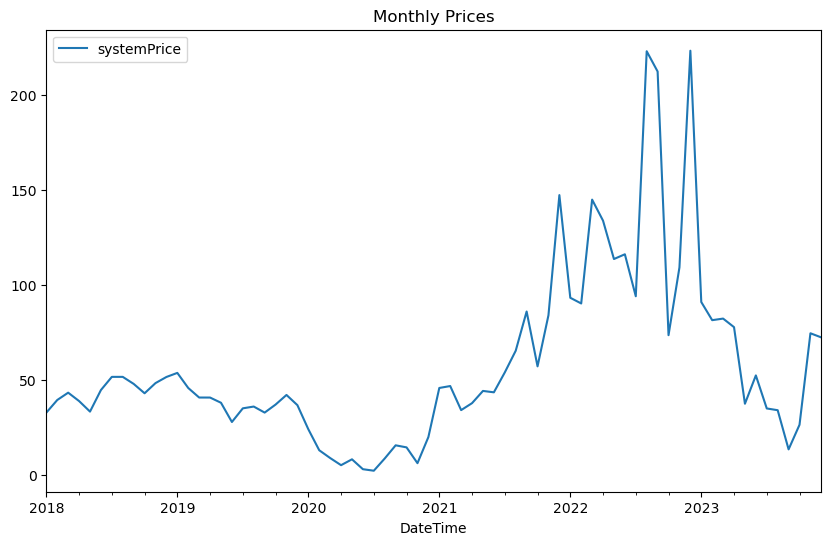

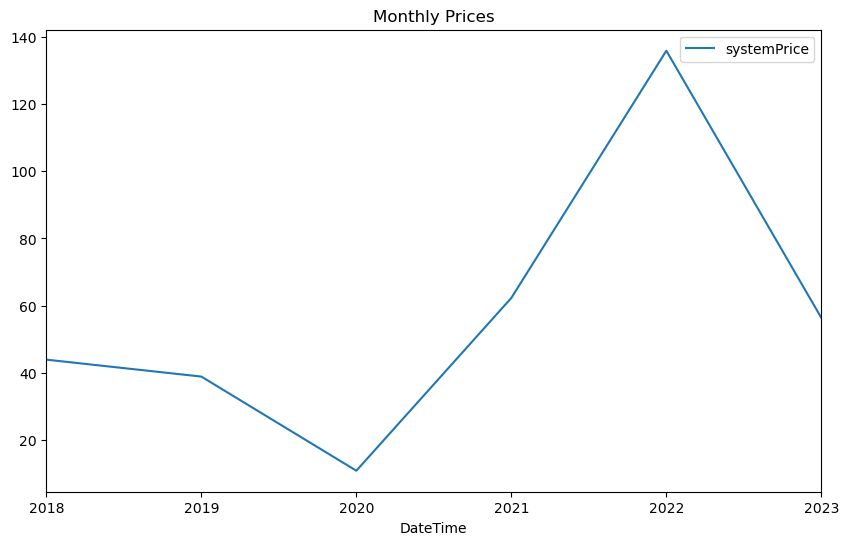

In [59]:

# Plotting daily data
daily_data.plot(figsize=(10, 6))
plt.title('Daily Prices')
plt.show()

# Plotting monthly data
weekly_data.plot(figsize=(10, 6))
plt.title('Monthly Prices')
plt.show()

# Similarly, for weekly and yearly
monthly_data.plot(figsize=(10, 6))
plt.title('Monthly Prices')
plt.show()

yearly_data.plot(figsize=(10, 6))
plt.title('Monthly Prices')
plt.show()

### Plotting for different years 

/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_33699/4247699518.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2018 = df['2023']


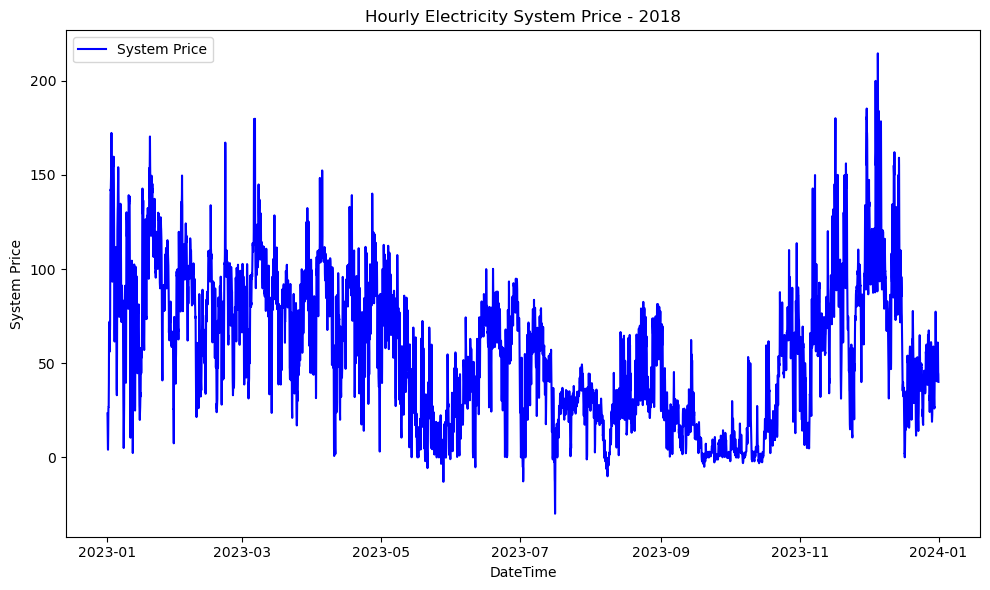

In [60]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the year 2020
df_2018 = df['2023']

plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.plot(df_2018.index, df_2018['systemPrice'], label='System Price', color='blue')  # Plot systemPrice for 2020
plt.title('Hourly Electricity System Price - 2018')  # Title for 2020
plt.xlabel('DateTime')  # X-axis label
plt.ylabel('System Price')  # Y-axis label
plt.legend()  # Show legend
plt.tight_layout()  # Optional: Adjust layout to make room for labels

# To show the plot if not automatically displayed
plt.show()


## Time series Decomposition 

/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_33699/528524379.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2023 = df['2023']


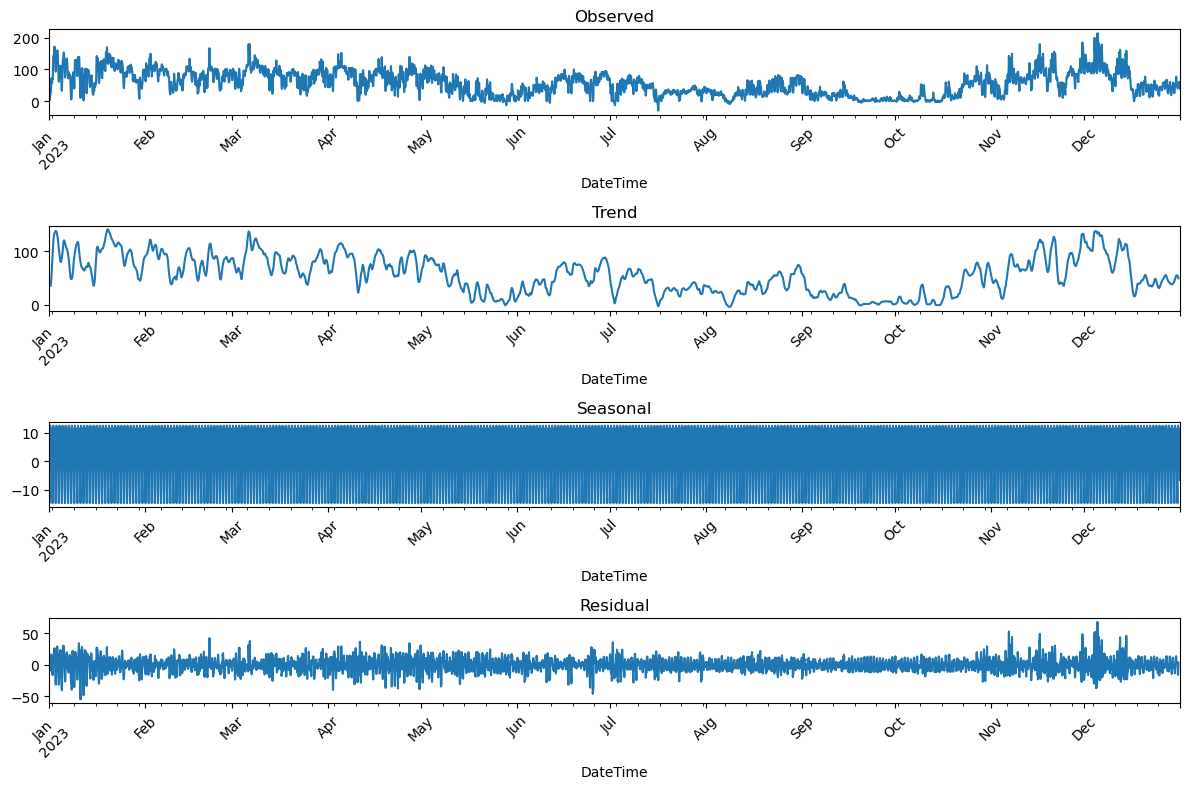

In [80]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your DataFrame is indexed by datetime and focusing on 2020
df_2023 = df['2023']
# Resample to daily data if needed
# daily_data_2023 = df_2023.resample('D').mean()


# Decompose the time series
decomposition = seasonal_decompose(df_2023['systemPrice'], model='additive', period=24)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))  # Adjust the figsize as necessary

# Plot the observed, trend, seasonal, and residual components
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')

# Rotate the x-axis labels for all subplots
for ax in [ax1, ax2, ax3, ax4]:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()


/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_33699/1973480335.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2023 = df['2023']


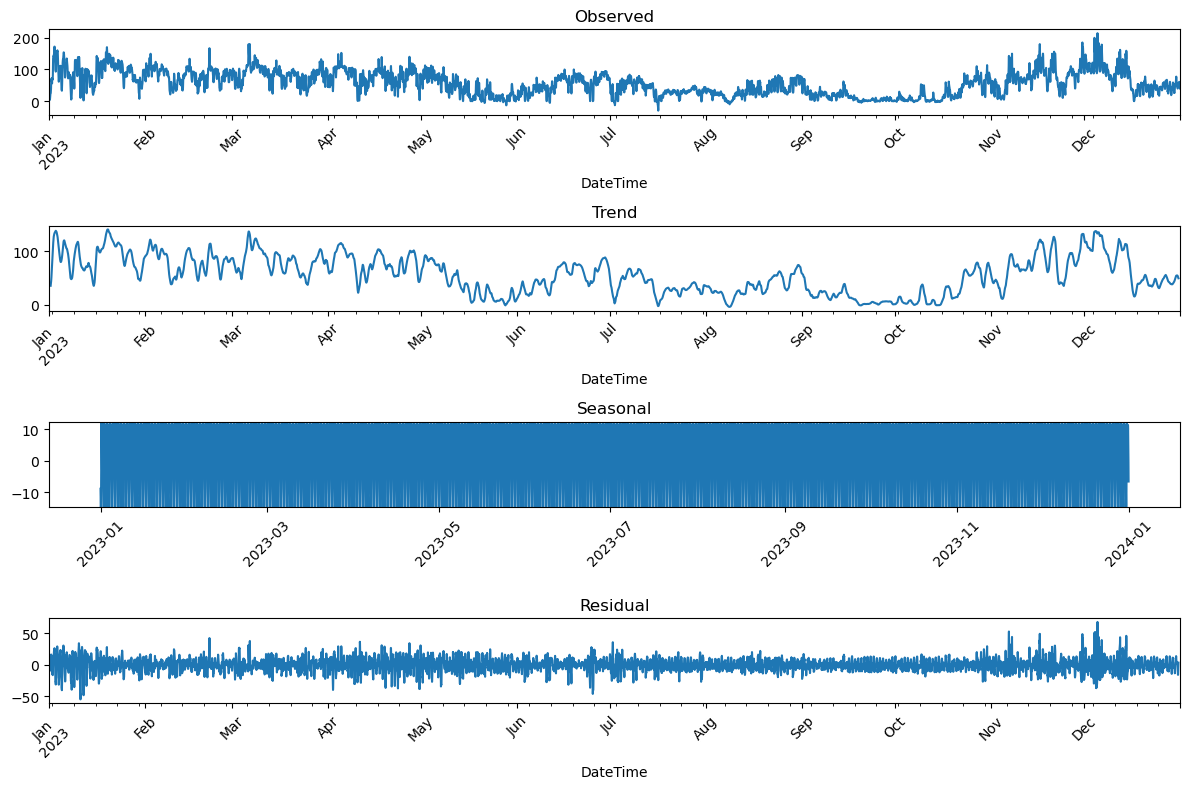

In [83]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your DataFrame is indexed by datetime and focusing on 2023
df_2023 = df['2023']

# Decompose the time series
decomposition = seasonal_decompose(df_2023['systemPrice'], model='additive', period=24)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))  # Adjust the figsize as necessary

# Plot the observed, trend, seasonal, and residual components
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')

# Here we plot the seasonal component and set y-axis limits
ax3.plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonal')
ax3.set_title('Seasonal')
ax3.set_ylim(decomposition.seasonal.min(), decomposition.seasonal.max())  # Set the y-axis limits

decomposition.resid.plot(ax=ax4, title='Residual')

# Rotate the x-axis labels for all subplots
for ax in [ax1, ax2, ax3, ax4]:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()


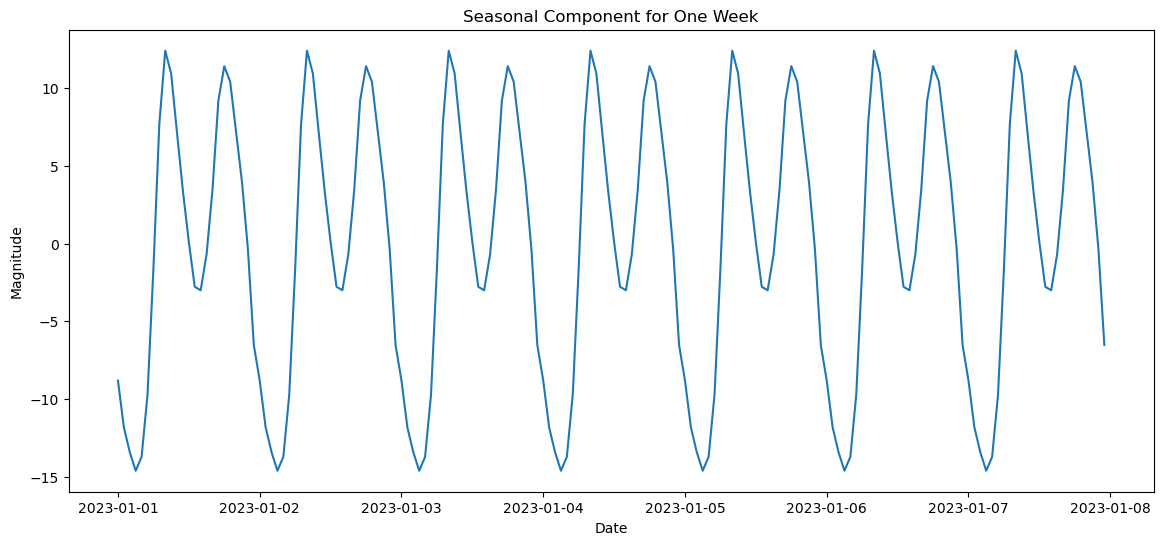

In [84]:
# Plot the seasonal component for a shorter timeframe
plt.figure(figsize=(14, 6))
plt.plot(decomposition.seasonal['2023-01-01':'2023-01-07'])  # Plotting just one week
plt.title('Seasonal Component for One Week')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.show()


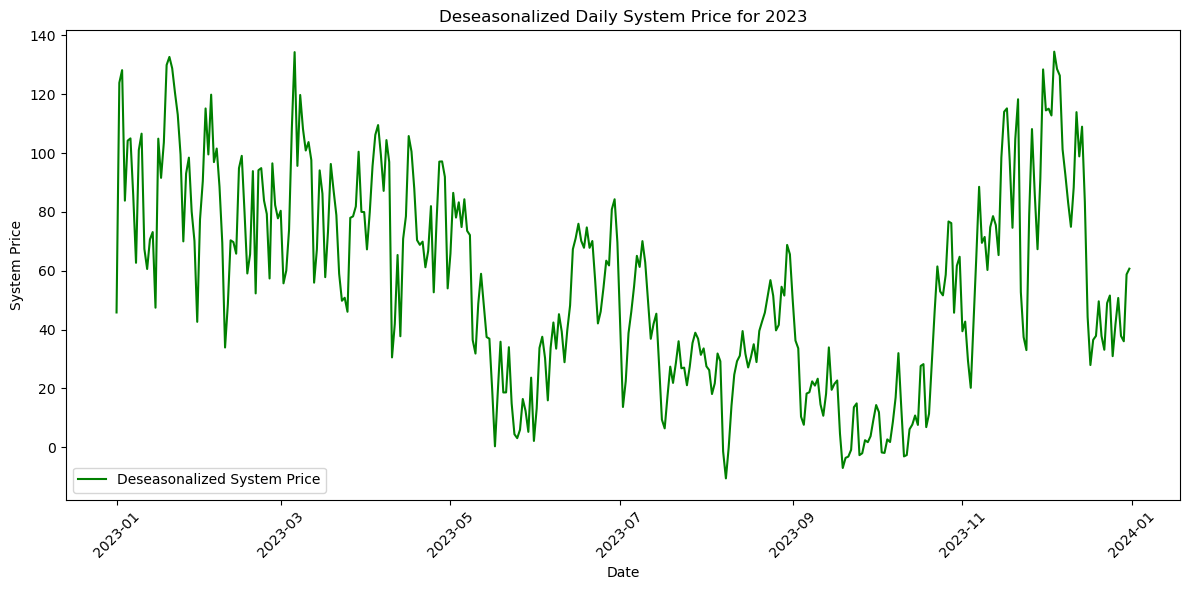

In [62]:
deseason = daily_data_2023['systemPrice'] - decomposition.seasonal 
# Plot the deseasonalized data
plt.figure(figsize=(12, 6))
plt.plot(deseason.index, deseason, label='Deseasonalized System Price', color='green')
plt.title('Deseasonalized Daily System Price for 2023')
plt.xlabel('Date')
plt.ylabel('System Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout
plt.show()

### Check for stationarity 

In [67]:
result = adfuller(df_2023['systemPrice'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -5.676678
p-value: 0.000001


/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


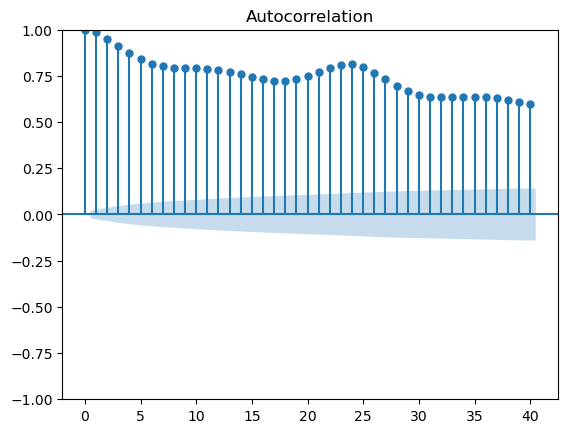

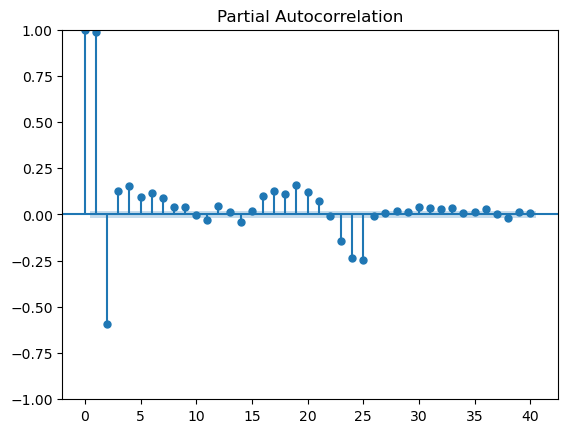

In [64]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced and seasonally differenced data
plot_acf(df_2023)
plot_pacf(df_2023)
plt.show()


In [43]:
deseasonalized = df_2023['systemPrice'].diff(24).dropna()
detrended_deseasonalized = deseasonalized.diff().dropna()


In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['systemPrice'], model='additive', period=24)
df['trend'] = decomposition.trend
df['seasonal'] = decomposition.seasonal
df['residual'] = decomposition.resid

detrended_deseasonalized = df['residual'].dropna()


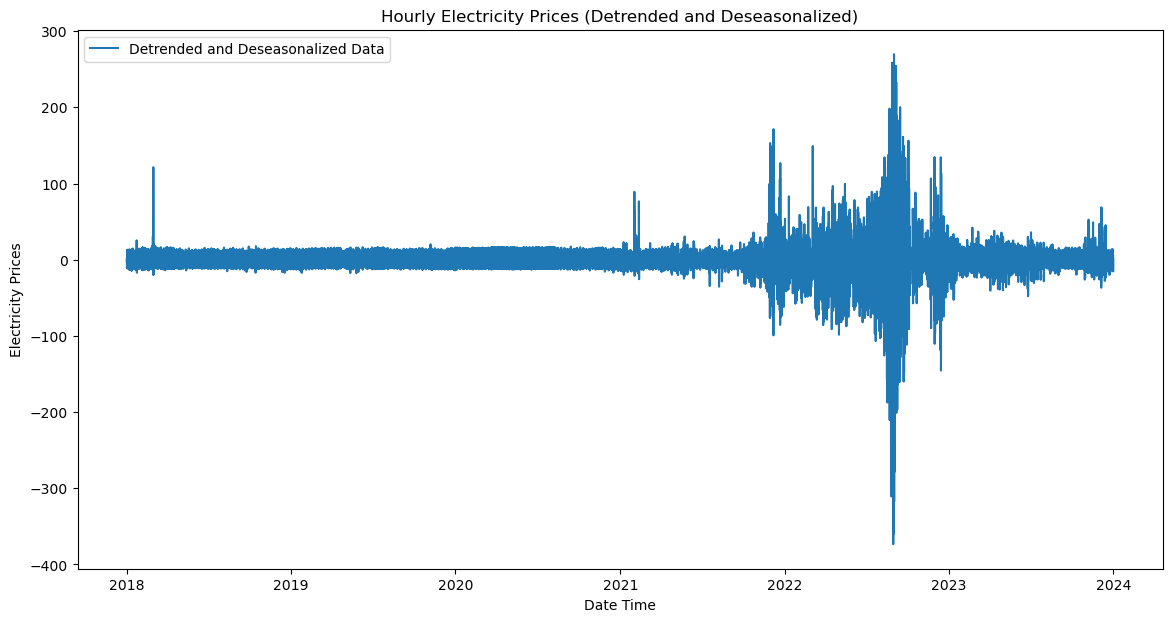

In [45]:
import matplotlib.pyplot as plt

# Plotting the differenced data
plt.figure(figsize=(14, 7))
plt.plot(detrended_deseasonalized, label='Detrended and Deseasonalized Data')
plt.title('Hourly Electricity Prices (Detrended and Deseasonalized)')
plt.xlabel('Date Time')
plt.ylabel('Electricity Prices')
plt.legend()
plt.show()


/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


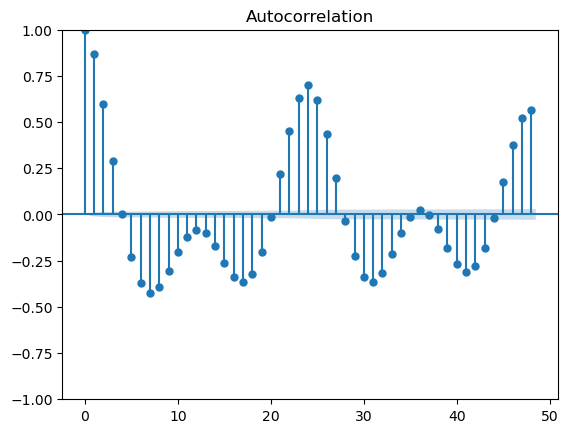

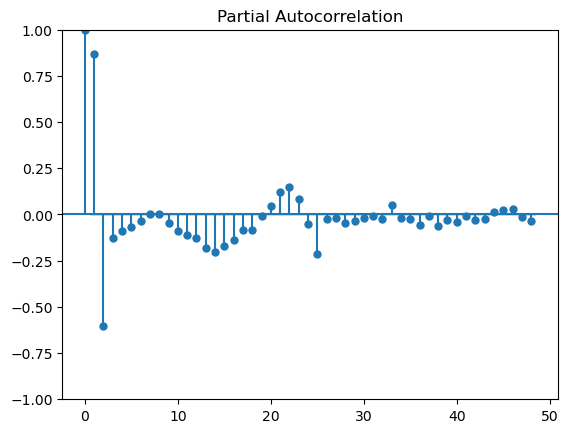

In [41]:
plot_acf(detrended_deseasonalized)
plot_pacf(detrended_deseasonalized)
plt.show()

### ARIMA